# start with importing all the data and packages needed

In [1]:
#load all the relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mlt

In [2]:
os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\Opensanctions\\Clean'

In [3]:
eu = pd.read_csv('eu_fsf.csv',low_memory=False)

# import trigger data

In [4]:
#load trigger data
conflict = pd.read_csv('IV\\ucdp_cleaned.csv')
conflict_os = pd.read_csv('IV\\ucdp_os.csv')
coup= pd.read_csv('IV\\coup_data.csv')
terror= pd.read_csv('IV\\data_gti.csv')
protest= pd.read_csv('IV\\acled_clean.csv')

# EU FSF list

**descriptives**

In [5]:
data = eu.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'schema', 'name', 'aliases',
       'birth_date', 'countries', 'addresses', 'identifiers', 'sanctions',
       'phones', 'emails', 'dataset', 'date_stamp', 'last_change',
       'listing_date', 'delisting_date', 'month', 'new_listing_count',
       'listing_count', 'iso', 'country_0', 'year_id', 'month_id'],
      dtype='object')
       Unnamed: 0.1    Unnamed: 0    date_stamp  listing_date  delisting_date  \
count  23566.000000  23566.000000  2.356600e+04  2.356600e+04    3.427000e+03   
mean   11782.500000   5738.361962  2.021644e+07  2.021644e+07    2.022125e+07   
std     6803.062558   3034.832656  5.871951e+03  5.871951e+03    3.250161e+03   
min        0.000000      1.000000  2.021082e+07  2.021082e+07    2.021092e+07   
25%     5891.250000   3185.500000  2.021082e+07  2.021082e+07    2.022022e+07   
50%    11782.500000   6019.500000  2.022022e+07  2.022022e+07    2.022022e+07   
75%    17673.750000   8399.000000  2.022031e+07  2.022031e

In [6]:
data = data.sort_values(by=['month'])

In [7]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis= 'columns')
data

,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,...,last_change,listing_date,delisting_date,month,new_listing_count,listing_count,iso,country_0,year_id,month_id
11782,eu-fsf-eu-3525-40,Person,Valery Vladimirovich KULIKOV,Valerij Vladimirovitj KULIKOV;Валерий Владимир...,1956-09-01,NaN,NaN,NaN,UKR - 2021/446 (OJ L87) - 2021-03-16,NaN,...,NaN,20210820,NaN,2021-08,2374,2374,NaN,NaN,2021,28
11636,eu-fsf-eu-3470-61,Person,Seyyed Morteza BAKHTIARI,NaN,NaN,NaN,NaN,NaN,IRN - 2020/510 (OJ L113) - 2020-04-08,NaN,...,NaN,20210820,NaN,2021-08,2374,2374,MAC,NaN,2021,28
11637,eu-fsf-eu-3470-61,Person,Seyyed Morteza BAKHTIARI,NaN,NaN,NaN,NaN,NaN,IRN - 2020/510 (OJ L113) - 2020-04-08,NaN,...,NaN,20210820,NaN,2021-08,2374,2374,NaN,NaN,2021,28
11638,eu-fsf-eu-3470-61,Person,Seyyed Morteza BAKHTIARI,NaN,NaN,NaN,NaN,NaN,IRN - 2020/510 (OJ L113) - 2020-04-08,NaN,...,NaN,20210820,NaN,2021-08,2374,2374,SJM,NaN,2021,28
11639,eu-fsf-eu-3470-61,Person,Seyyed Morteza BAKHTIARI,NaN,NaN,NaN,NaN,NaN,IRN - 2020/510 (OJ L113) - 2020-04-08,NaN,...,NaN,20210820,NaN,2021-08,2374,2374,ALA,NaN,2021,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21230,NK-KS9ZTaBTahq7mYBAJFYuAC,Person,Nyo Saw,NaN,NaN,mm,NaN,NaN,MMR - 2023/2789 (OJ L11122023) - 2023-12-11,NaN,...,2023-12-13T12:57:01,20231214,NaN,2023-12,59,59,MLT,mm,2023,24
21236,NK-NqRdBLBc3oBoAWSn9jEP6u,Person,Hmu Htan,NaN,NaN,mm,NaN,NaN,MMR - 2023/2789 (OJ L11122023) - 2023-12-11,NaN,...,2023-12-13T12:57:01,20231214,NaN,2023-12,59,59,MLT,mm,2023,24
21352,eu-fsf-eu-10870-83,Person,Wunna Maung Lwin,NaN,1952-05-30,mm,NaN,NaN,MMR - 2023/2789 (OJ L11122023) - 2023-12-11,NaN,...,2023-12-13T12:57:01,20231213,20231213.0,2023-12,59,59,MLT,mm,2023,24
20939,eu-fsf-eu-10856-42,Person,Hadi ZAHOURIAN,Hádí Zahourian;هادی ظهوریان,NaN,ir,NaN,0055312047,IRN - 2023/2793 (OJ L11122023) - 2023-12-11,NaN,...,2023-12-13T12:57:01,20231213,20231213.0,2023-12,59,59,IRN,ir,2023,24


In [8]:
print(data.listing_count.unique())

[2374 1264 1002  576  177   43 1292  573  499  172  452  196   45   32
  123  149  516   89  256  213    8   78  144  143   74   31   17   59]


In [9]:
#get the number of listings per month
listing_month = data.groupby('month').new_listing_count.sum()
listing_month

month
2021-08    14614344
2021-09     2761840
2021-10     1853700
2021-11      634176
2021-12       20709
2022-01        2193
2022-02     6602120
2022-03     1126518
2022-04      779438
2022-05       35260
2022-06      216508
2022-07       60760
2022-08        3915
2022-09        1216
2022-10       16851
2022-11       28012
2022-12      278124
2023-01        8811
2023-02       75264
2023-03       53889
2023-04         184
2023-05        8580
2023-06       19872
2023-07       38808
2023-08       13013
2023-09       10138
2023-10        1984
2023-11         374
2023-12        3304
Name: new_listing_count, dtype: int64

In [10]:
data['listing_month'] = data['new_listing_count'].groupby(data['month']).transform('sum')

In [11]:
print(data.listing_month.unique())

[14614344  2761840  1853700   634176    20709     2193  6602120  1126518
   779438    35260   216508    60760     3915     1216    16851    28012
   278124     8811    75264    53889      184     8580    19872    38808
    13013    10138     1984      374     3304]


Text(0.5, 1.0, 'Accumulated monthly listings EU FSF')

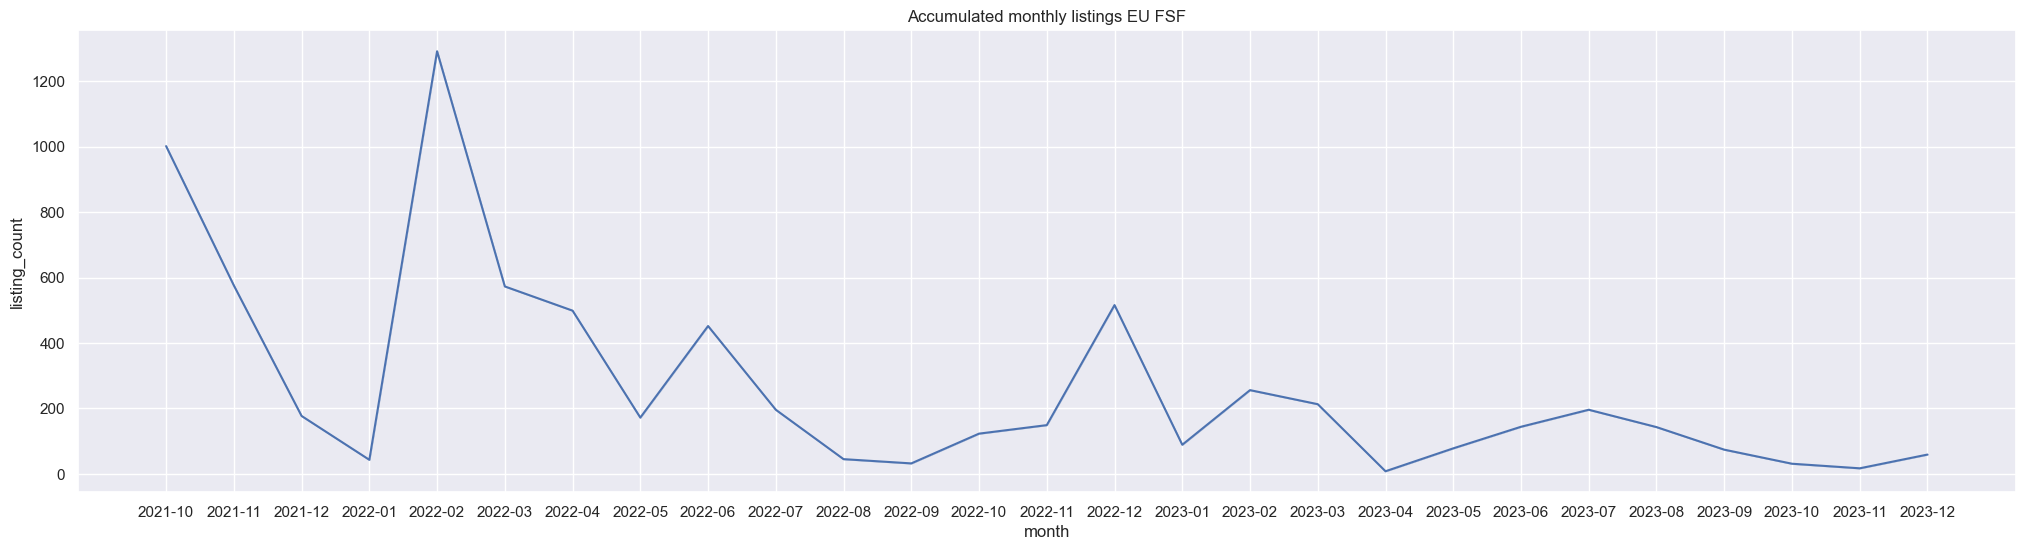

In [12]:
#get the total listings per month
data = data[data['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_eu_fsf = sns.lineplot(data=data,x='month',y='listing_count').set_title('Accumulated monthly listings EU FSF')
listings_eu_fsf.figure.savefig('listings_eu_fsf')
listings_eu_fsf

Text(0.5, 1.0, 'New monthly listings EU FSF')

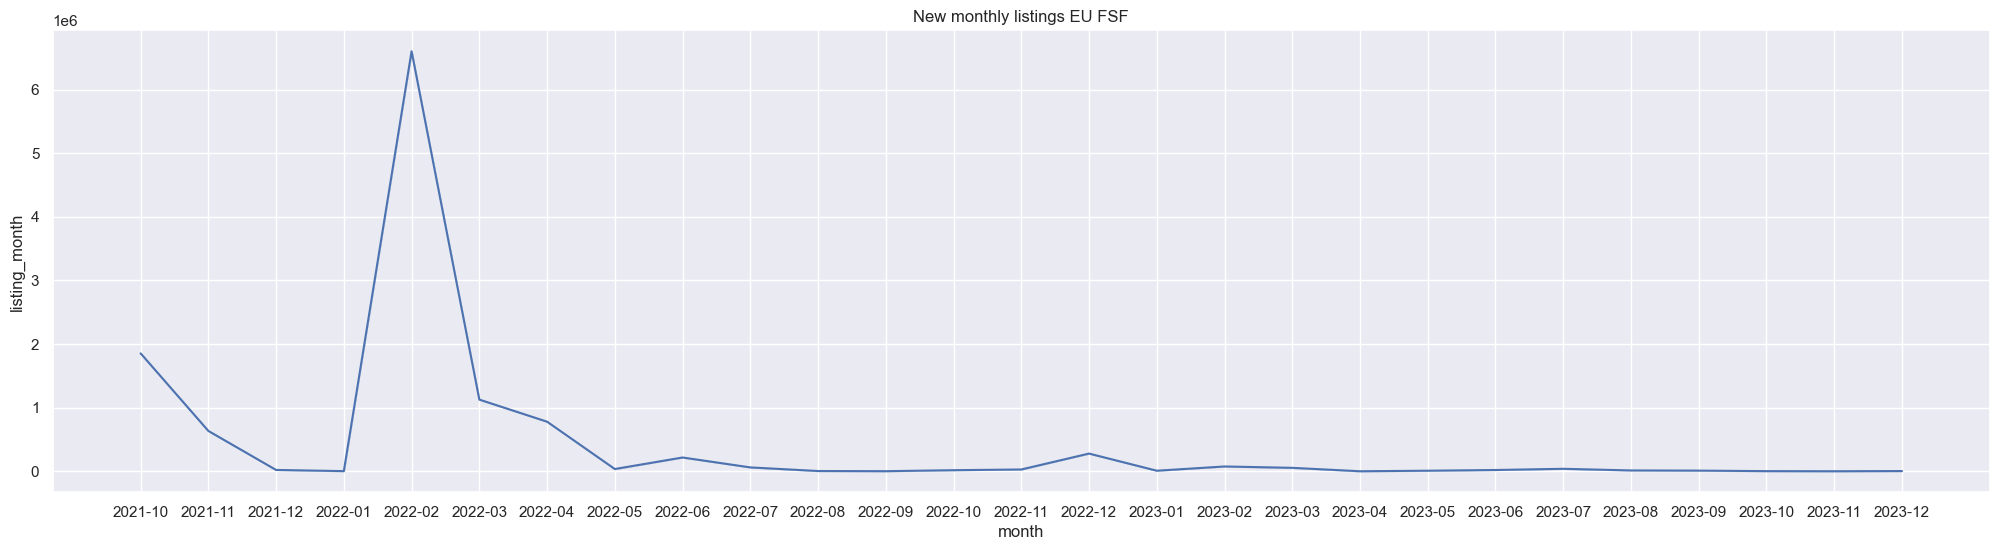

In [13]:
#get the total listings per month
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_eu_fsf = sns.lineplot(data=data,x='month',y='listing_month').set_title('New monthly listings EU FSF')
listings_eu_fsf.figure.savefig('new_listings_eu_fsf')
listings_eu_fsf

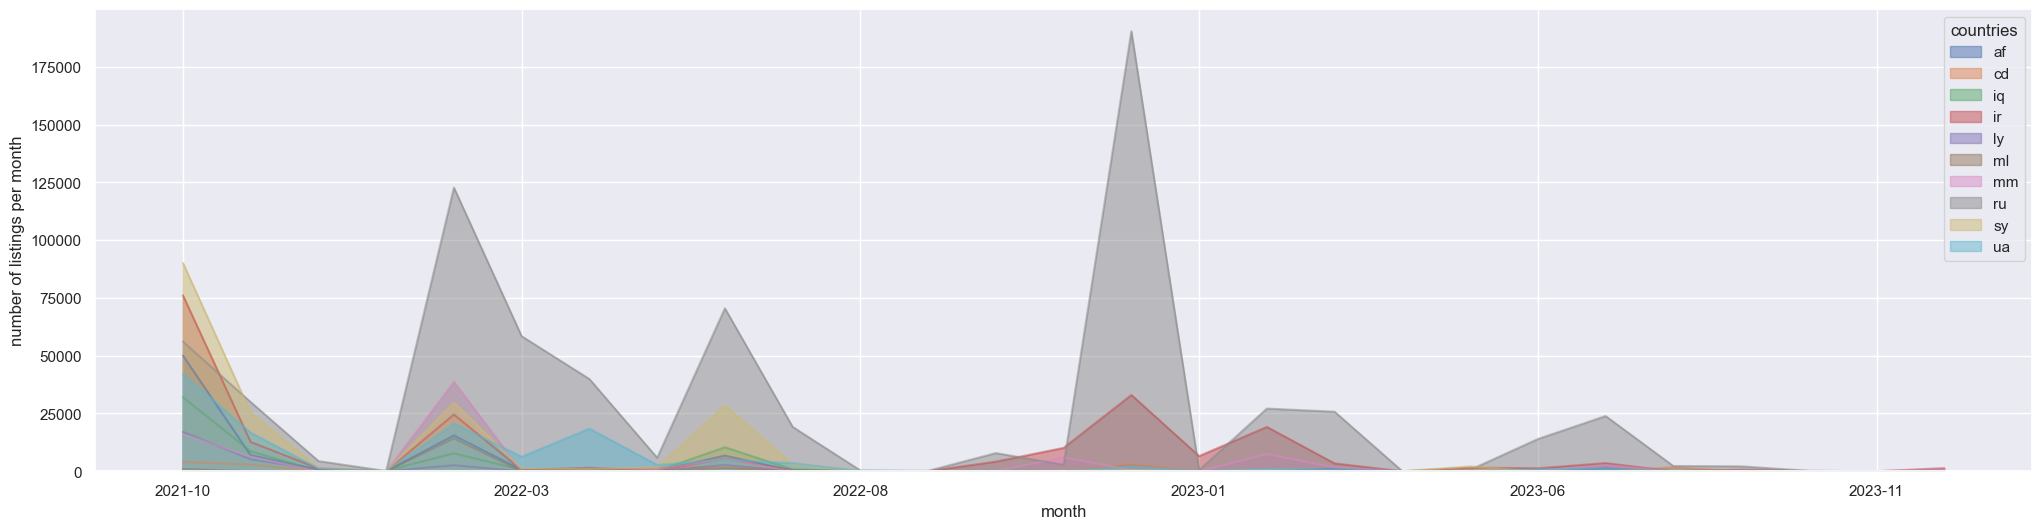

In [14]:
#time trend of the top iso codes
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
grouped2 = data.groupby(['countries', 'month']).agg({'listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'listing_count': 'sum'}).nlargest(10, 'listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month', columns='countries', values='listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of listings per month')
plt.savefig('timetrend_eu_fsf_listings_stacked.png')

# Show the plot
plt.show()

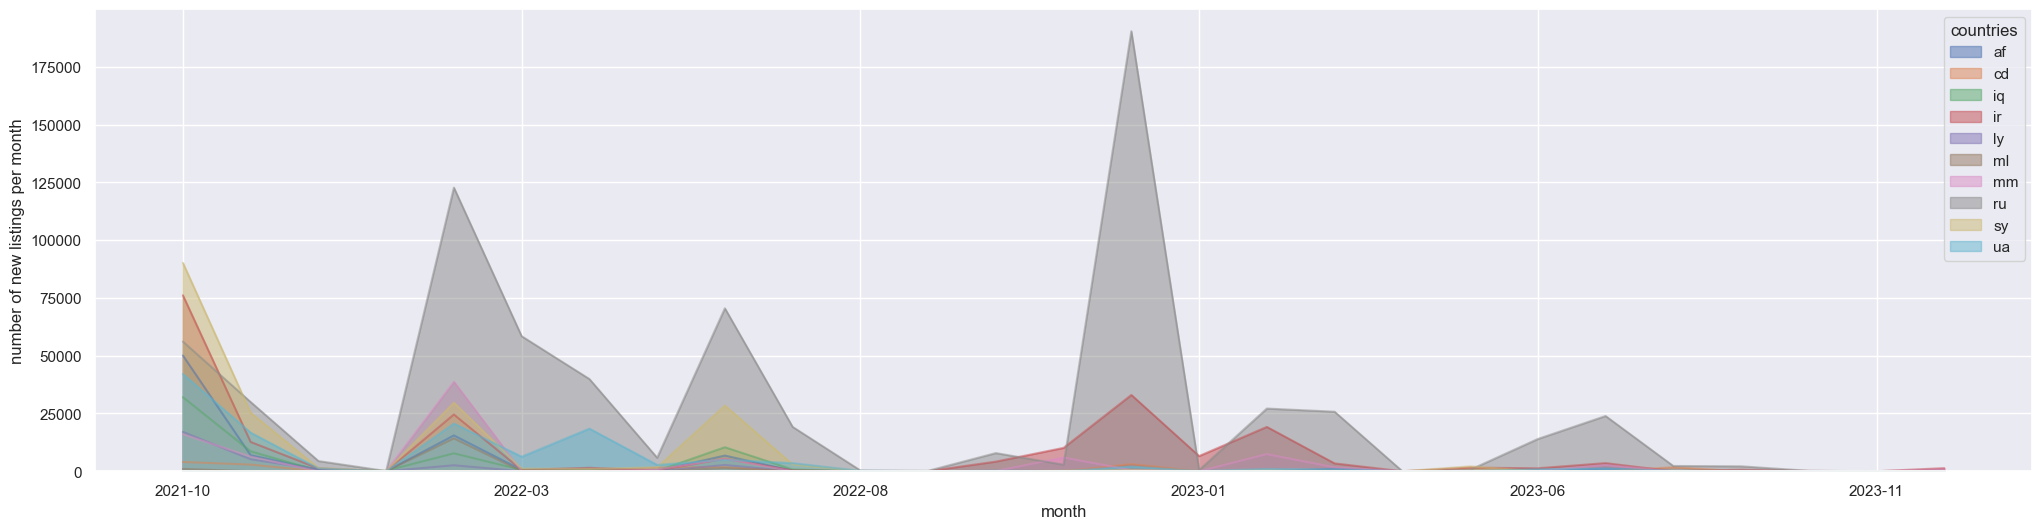

In [15]:
#time trend of the top iso codes
grouped2 = data.groupby(['countries', 'month']).agg({'new_listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'new_listing_count': 'sum'}).nlargest(10, 'new_listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month', columns='countries', values='new_listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of new listings per month')
plt.savefig('timetrend_eu_fsf_new_listings.png')

# Show the plot
plt.show()

In [16]:
#get the sates with the most new listings
data['listing_date'].value_counts().nlargest(10)

listing_date
20220226    2097
20220225    1763
20220411     798
20220310     751
20220312     731
20220227     703
20220414     652
20211005     501
20211014     370
20211004     310
Name: count, dtype: int64

In [17]:
#get the top shema
data['schema'].value_counts().nlargest(5)

schema
Person          13142
Organization     2083
Name: count, dtype: int64

In [18]:
#get the top sanctions regime
data['sanctions'].value_counts().nlargest(25)

sanctions
UKR - 2022/261 (OJ L42I) - 2022-02-23       3785
UKR - 2022/396 (OJ L80) - 2022-03-09        1576
UKR - 2022/581 (OJ L110) - 2022-04-08       1558
UKR - 2022/332 (OJ L53) - 2022-02-25         884
SYR - 2020/716 (OJ L168) - 2020-05-30        732
UKR - 2022/2476 (OJ L322-I) - 2022-12-16     399
IRN - 267/2012 (OJ L88) - 2012-03-23         297
UKR - 2023/429 (OJ L59 I) - 2023-02-25       229
UKR - 2023/1216 (OJ L159 I) - 2023-06-23     224
BLR - 2021/339 (OJ L68) - 2021-02-27         217
UKR - 2020/398 (OJ L78) - 2020-03-14         212
IRN - 2020/510 (OJ L113) - 2020-04-08        201
VEN - 2020/1696 (OJ L381) - 2020-11-13       182
UKR - 2022/878 (OJ L153) - 2022-06-03        177
UKR - 2022/1270 (OJ L193) - 2022-07-21       143
UKR - 2020/1267 (OJ L298) - 2020-09-12       139
IRN - 2021/587 (OJ L125) - 2021-04-13        118
IRN - 2017/1124 (OJ L163) - 2017-06-25       114
UKR - 2022/336 (OJ L58) - 2022-02-28         103
SYR - 2021/848 (OJ L188) - 2021-05-29         85
IRN - 2023

**filter russia**

TO DO: legal docs raussuchen!!!!

In [19]:
data_russ=data[data['countries'].str.contains("ru")==True]

In [20]:
print(data_russ.sanctions.unique())

['UKR - 2021/1791 (OJ L359I) - 2021-10-11'
 'UKR - 2020/398 (OJ L78) - 2020-03-14'
 'UKR - 2020/1267 (OJ L298) - 2020-09-12'
 'HR - 2021/371 (OJ L71I) - 2021-03-02'
 'UKR - 2019/409 (OJ L73) - 2019-03-15'
 'UKR - 2021/446 (OJ L87) - 2021-03-16'
 'UKR - 2019/1403 (OJ L236) - 2019-09-14'
 'UKR - 2021/1464 (OJ L321) - 2021-09-14'
 'CYB - 2020/1125 (OJ L246) - 2020-07-30'
 'BLR - 2021/339 (OJ L68) - 2021-02-27' nan
 'CYB - 2020/1536 (OJ L351I) - 2020-10-22'
 'HR - 2021/478 (OJ L99I) - 2021-03-22'
 'CHEM - 2020/1480 (OJ L341) - 2020-10-15'
 'TAQA - 2016/1347 (OJ L 214) - 2016-08-09'
 'CHEM - 2019/84 (OJ L18 I) - 2019-01-21'
 'UKR - 2021/2193 (OJ L445I) - 2021-12-13'
 'HR - 2021/2195 (OJ L445I) - 2021-12-13'
 'LBY - 2021/2192 (OJ L445I) - 2021-12-13'
 'LBY - 2020/1481 (OJ L341) - 2020-10-15'
 'SYR - 2021/2194 (OJ L445I) - 2021-12-13'
 'HR - 2021/2195 (OJ L445I) - 2021-12-13;UKR - 2021/2193 (OJ L445I) - 2021-12-13'
 'UKR - 2022/332 (OJ L53) - 2022-02-25'
 'UKR - 2022/260 (OJ L42I) - 2022-02-2

In [21]:
data_russ2=data[data['sanctions'].str.contains("UKR - 2022|UKR - 2023")==True]

In [22]:
print(data_russ2.countries.unique())
print(data_russ2.sanctions.unique())

[nan 'ru' 'ua' 'uz' 'kz' 'am' 'sy' 'cy' 'ir' 'ae' 'kg' 'lv']
['UKR - 2022/261 (OJ L42I) - 2022-02-23'
 'UKR - 2022/332 (OJ L53) - 2022-02-25'
 'UKR - 2022/260 (OJ L42I) - 2022-02-23'
 'UKR - 2022/236 (OJ L40) - 2022-02-21'
 'UKR - 2021/446 (OJ L87) - 2021-03-16;UKR - 2022/261 (OJ L42I) - 2022-02-23'
 'UKR - 2022/396 (OJ L80) - 2022-03-09'
 'UKR - 2022/427 (OJ L87I) - 2022-03-15'
 'UKR - 2022/336 (OJ L58) - 2022-02-28'
 'UKR - 2022/353 (OJ L66) - 2022-03-02'
 'UKR - 2021/1464 (OJ L321) - 2021-09-14;UKR - 2022/332 (OJ L53) - 2022-02-25'
 'UKR - 2022/581 (OJ L110) - 2022-04-08'
 'UKR - 2022/408 (OJ L84) - 2022-03-12'
 'UKR - 2022/658 (OJ L120) - 2022-04-21'
 'UKR - 2019/352 (OJ L64) - 2019-03-05;UKR - 2022/658 (OJ L120) - 2022-04-21'
 'UKR - 2022/878 (OJ L153) - 2022-06-03'
 'UKR - 2022/1270 (OJ L193) - 2022-07-21'
 'UKR - 2022/1274 (OJ L194) - 2022-07-21'
 'UKR - 2022/1354 (OJ L204I) - 2022-08-04'
 'UKR - 2022/1446 (OJ L227I) - 2022-09-01'
 'UKR - 2022/1906 (OJ L259 I) - 2022-10-06'
 'UK

In [23]:
match= data_russ['countries'].equals(data_russ2['countries'])
print(match)

False


[Text(0.5, 1.0, 'new RUSSIA listings per month, EU FSF list')]

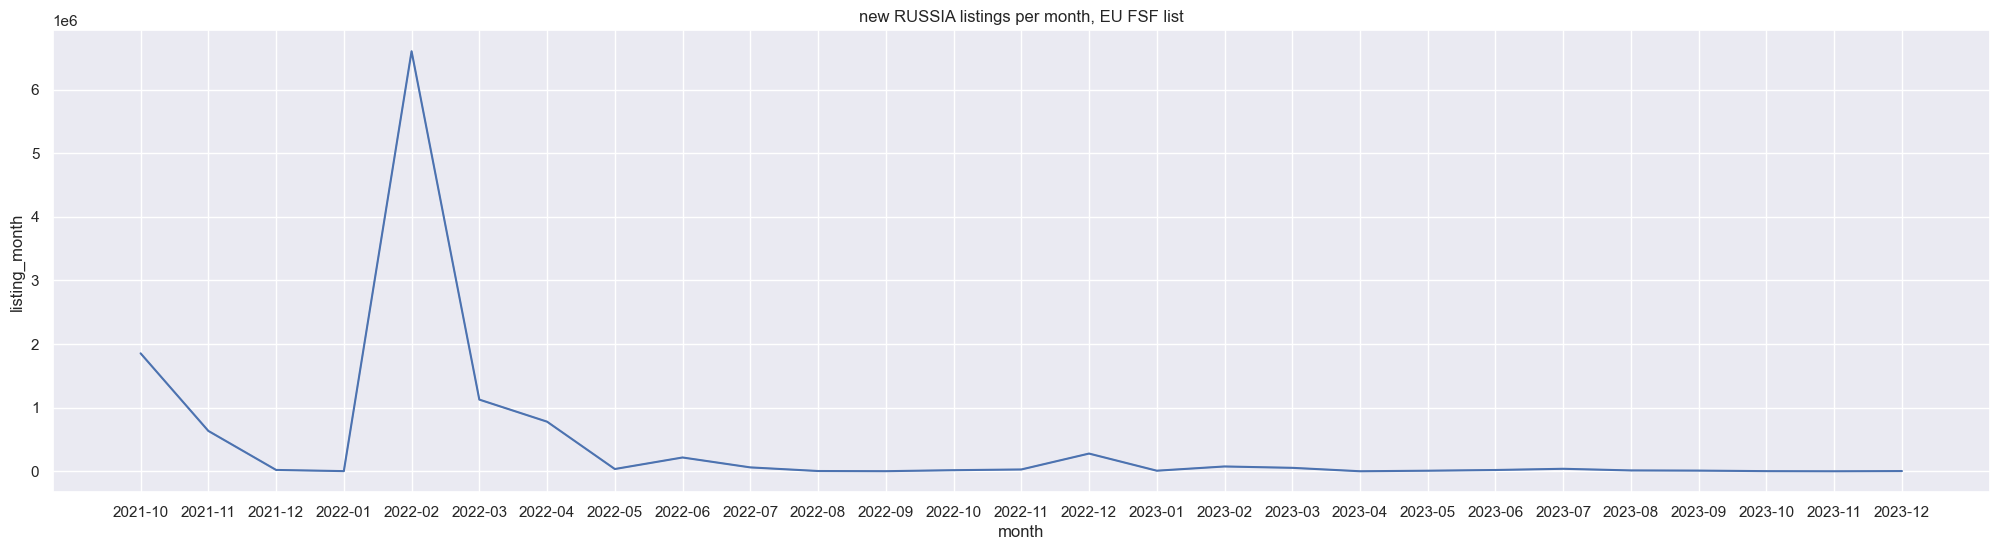

In [24]:
#make wider and remove outliers
data_russ = data_russ[data_russ['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ = sns.lineplot(data=data_russ,x='month',y='listing_month').set(title="new RUSSIA listings per month, EU FSF list")
plot_russ

[Text(0.5, 1.0, 'RUSSIA listings per month accumulated, EU FSF list')]

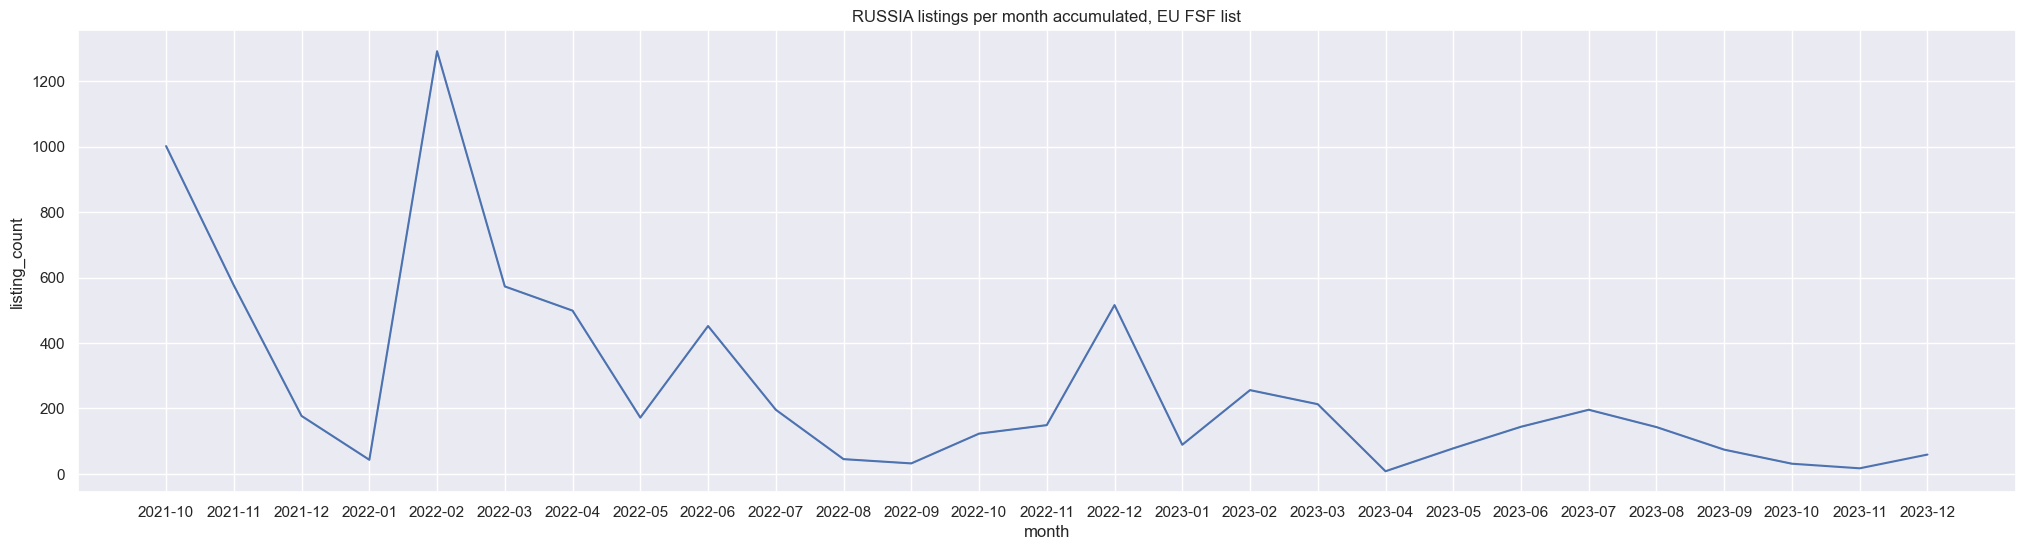

In [25]:
#make wider and remove outliers
data_russ = data_russ[data_russ['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ = sns.lineplot(data=data_russ,x='month',y='listing_count').set(title="RUSSIA listings per month accumulated, EU FSF list")
plot_russ

[Text(0.5, 1.0, 'new listings for legislation on Ukraine Invasion, EU FSF list')]

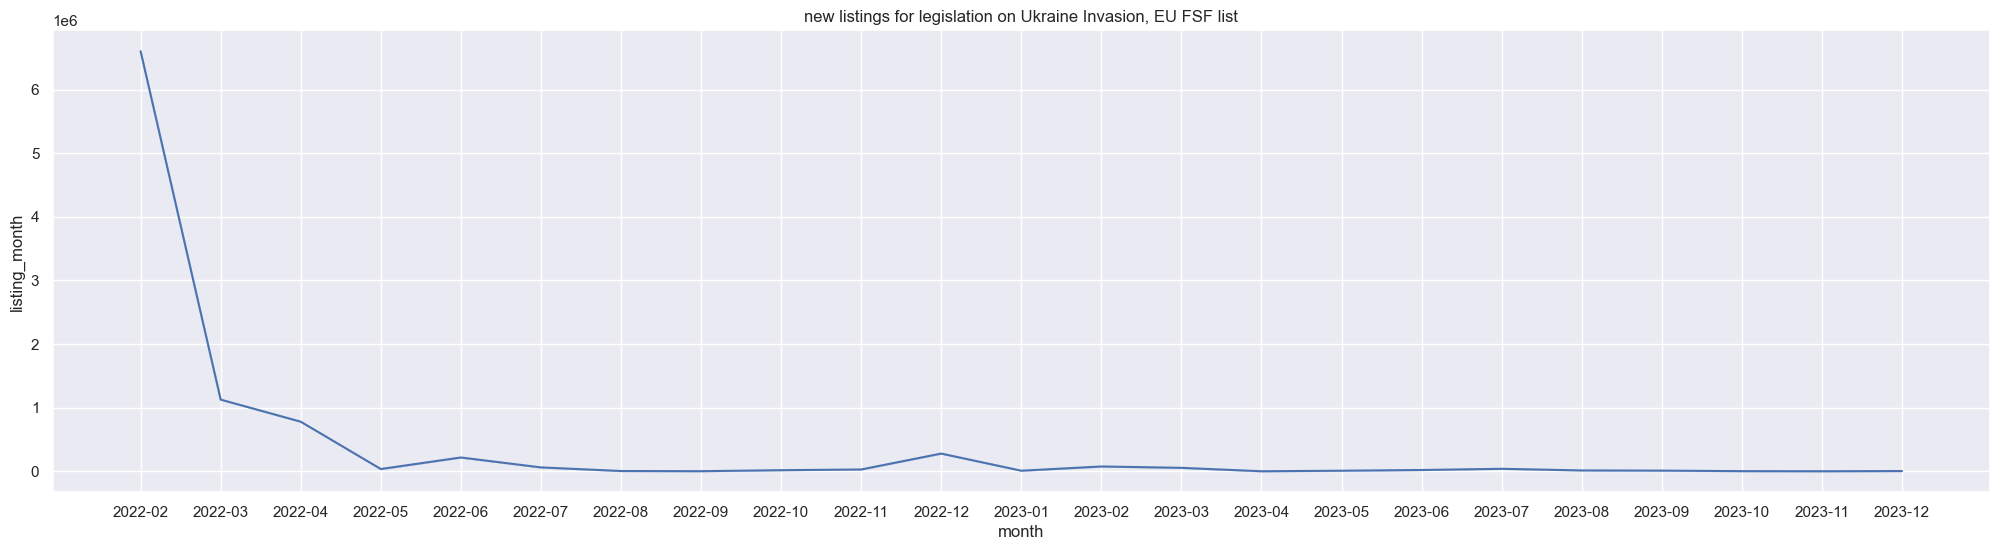

In [26]:
#make wider and remove outliers
data_russ2 = data_russ2[data_russ2['month'] > '2021-08']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ2 = sns.lineplot(data=data_russ2,x='month',y='listing_month').set(title="new listings for legislation on Ukraine Invasion, EU FSF list")
plot_russ2

[Text(0.5, 1.0, 'listings for legislationon Ukraine Invasion, EU FSF list')]

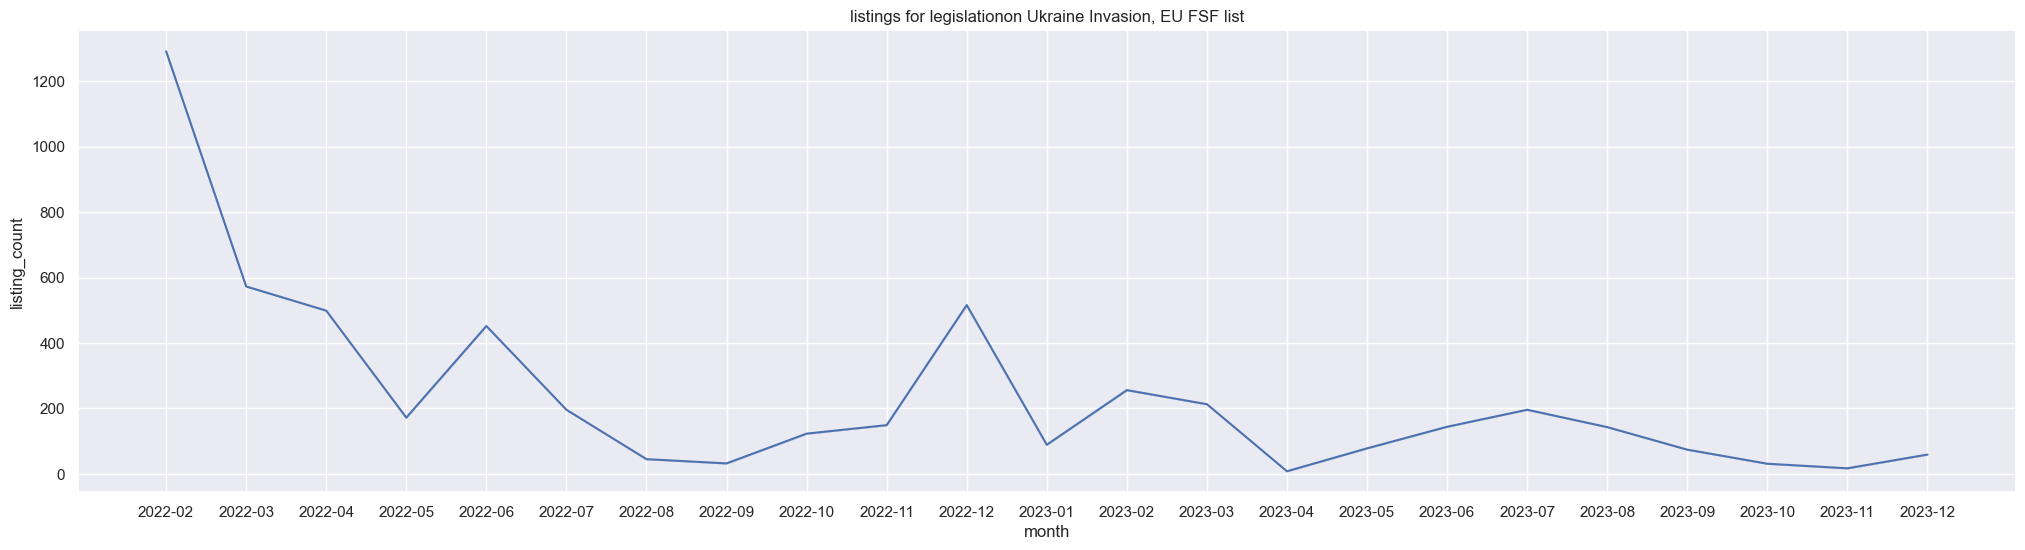

In [27]:
#make wider and remove outliers
data_russ2 = data_russ2[data_russ2['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ2 = sns.lineplot(data=data_russ2,x='month',y='listing_count').set(title="listings for legislationon Ukraine Invasion, EU FSF list")
plot_russ2

# add trigger events

In [28]:
conflict.describe
# get a month id
conflict['month'] = pd.to_datetime(conflict['conflict_event']).dt.to_period('M')
conflict_os['month'] = pd.to_datetime(conflict_os['conflict_event']).dt.to_period('M')

In [29]:
print(conflict.columns)
conflict = conflict.sort_values(by=['month'])
print(conflict)
print(conflict_os.columns)
conflict_os = conflict_os.sort_values(by=['month'])
print(conflict_os)
print(protest.columns)
protest = protest.sort_values(by=['month'])
print(protest)

Index(['Unnamed: 0', 'id', 'relid', 'year', 'type_of_violence', 'country',
       'country_id', 'fatality_best_estimate', 'gwnoa', 'gwnob',
       'conflict_event', 'iso', 'month'],
      dtype='object')
      Unnamed: 0      id                 relid  year  type_of_violence  \
1507       85255  327584    DRC-2020-2-15650-0  2020               2.0   
1872       85722  325549    DRC-2020-3-16065-4  2020               3.0   
1873       85723  327127    DRC-2020-3-16065-5  2020               3.0   
1542       85310  325162    DRC-2020-2-15892-0  2020               2.0   
997        83689  377179   DRC-2020-1-10509-21  2020               1.0   
...          ...     ...                   ...   ...               ...   
957        83165  460439    DRC-2022-3-2434-27  2022               3.0   
956        83164  460230    DRC-2022-3-2434-26  2022               3.0   
894        81915  460094    AFG-2022-3-973-669  2022               3.0   
2798       86694  460325    DRC-2022-2-17417-5  2022    

**now plot the association**

In [30]:
#transfrom month to string
conflict['month'] = conflict['month'].astype(str)
#conflict['month'] = pd.to_datetime(conflict['month'])
conflict.month.dtypes

conflict_os['month'] = conflict_os['month'].astype(str)
conflict_os.month.dtypes

protest['month'] = protest['month'].astype(str)
protest.month.dtypes

dtype('O')

In [31]:
#get the new listings per month toether with conflict fatalities and protest events
# combined plot
grouped_1 = data.groupby(['month']).agg({'new_listing_count': 'sum'})
grouped_2 = conflict.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_3 = conflict_os.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_4 = protest.groupby(['month']).agg({'event_count': 'sum'})
grouped_1 = grouped_1.reset_index()
grouped_2 = grouped_2.reset_index()
grouped_3 = grouped_3.reset_index()
grouped_4 = grouped_4.reset_index()

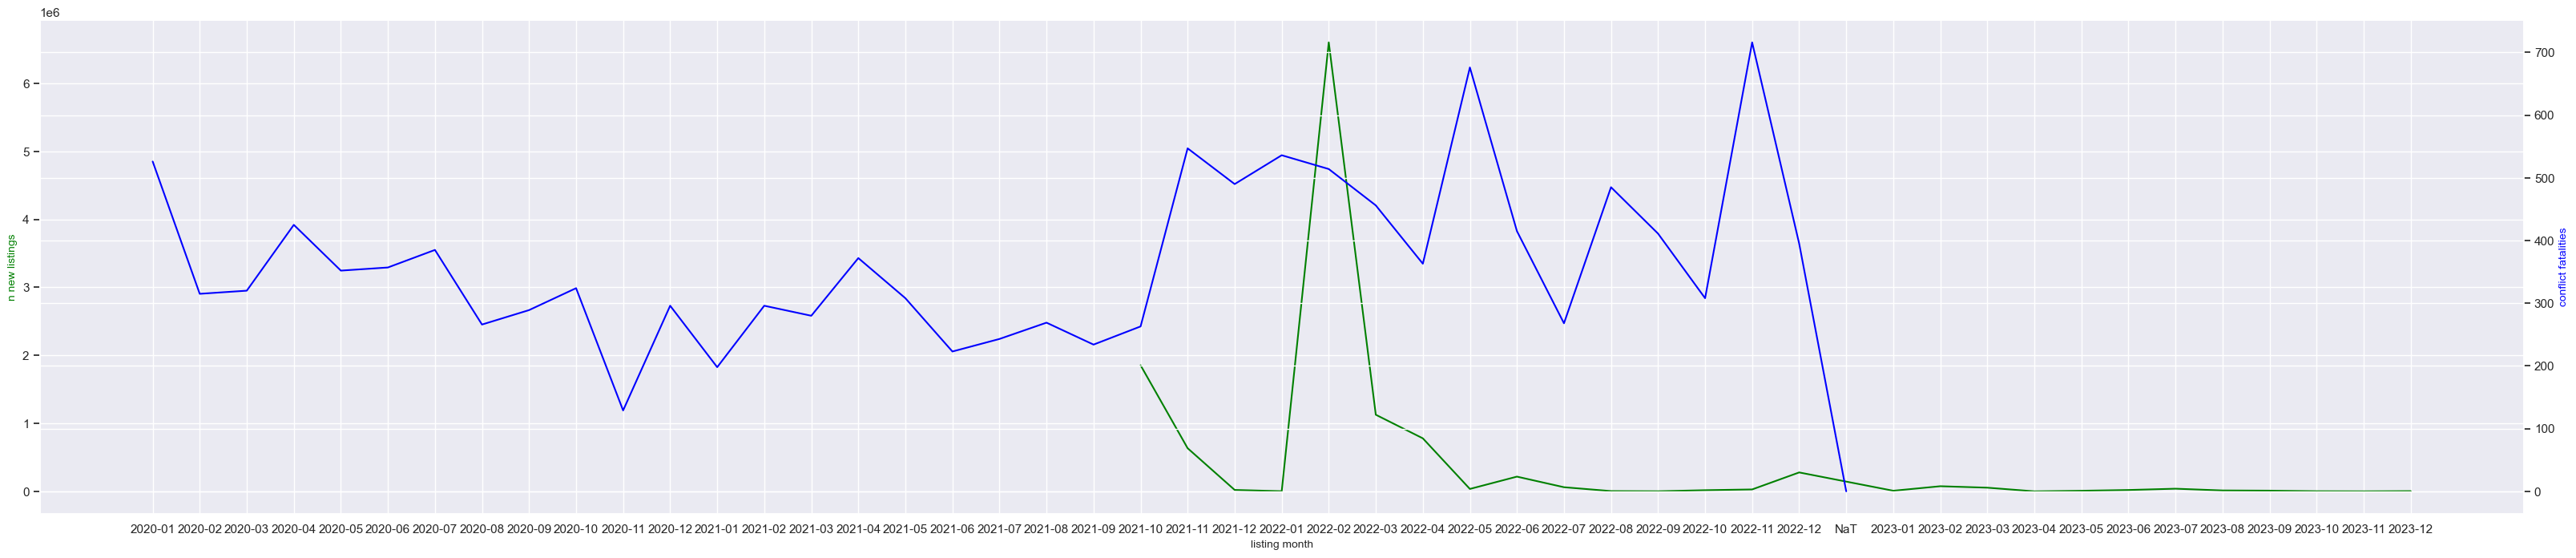

In [32]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(grouped_2.month, grouped_2["fatality_best_estimate"],color="blue")
ax2.set_ylabel("conflict fatalities",color="blue",fontsize=10)
plt.savefig('timetrend_eu_fsf_combined_conflict.png')
plt.show()

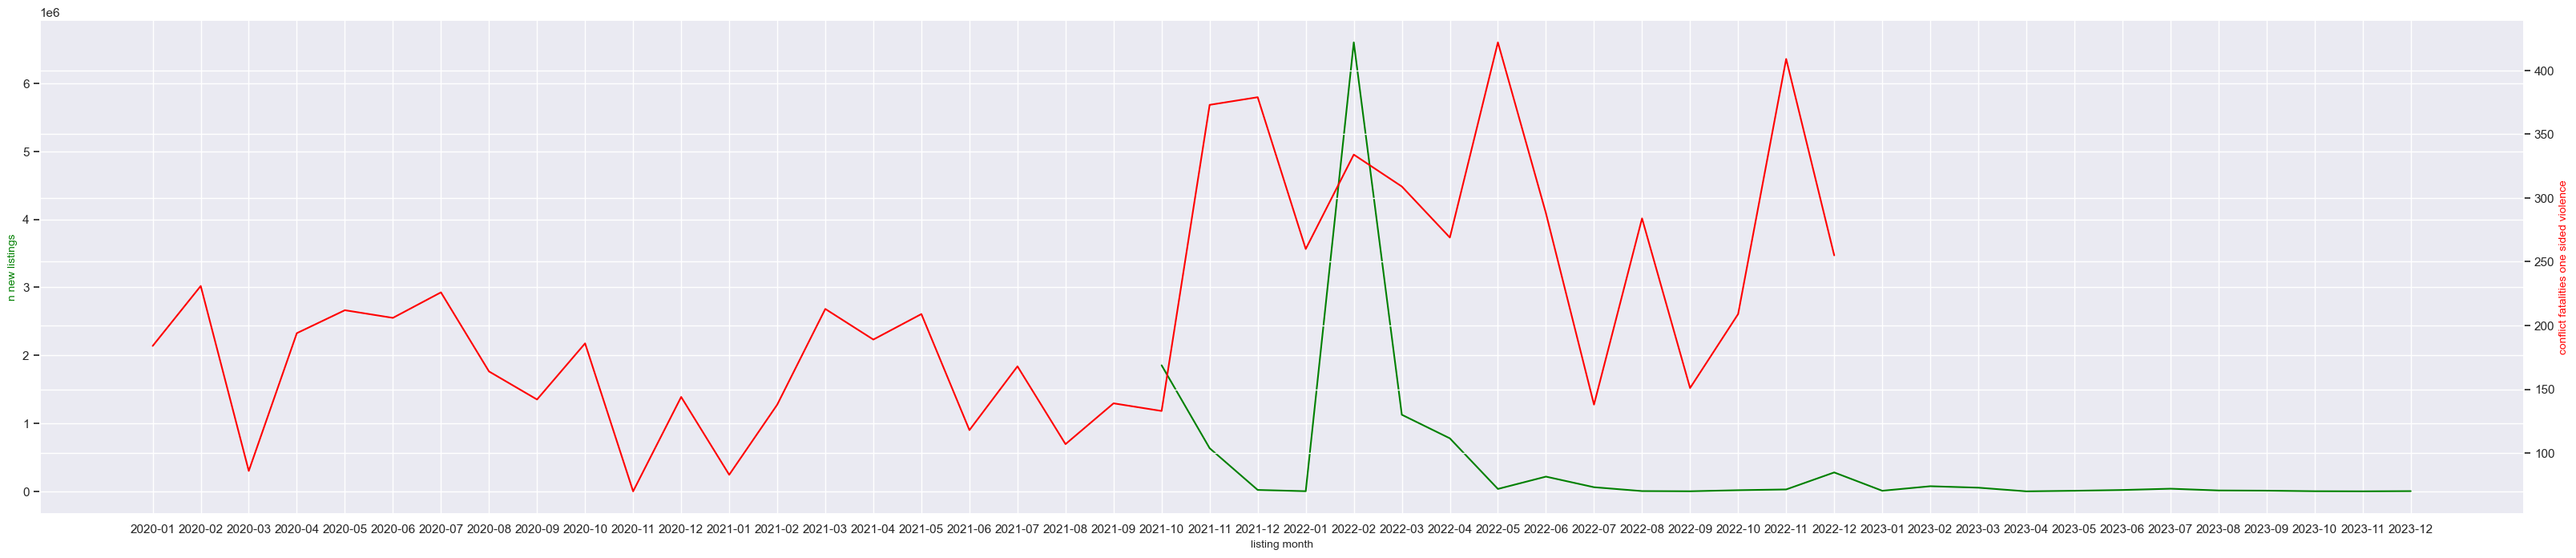

In [33]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax3=ax.twinx()
# make a plot with different y-axis using second axis object
ax3.plot(grouped_3.month, grouped_3["fatality_best_estimate"],color="red")
ax3.set_ylabel("conflict fatalities one sided violence",color="red",fontsize=10)
plt.savefig('timetrend_eu_fsf_combined_conflict_os.png')

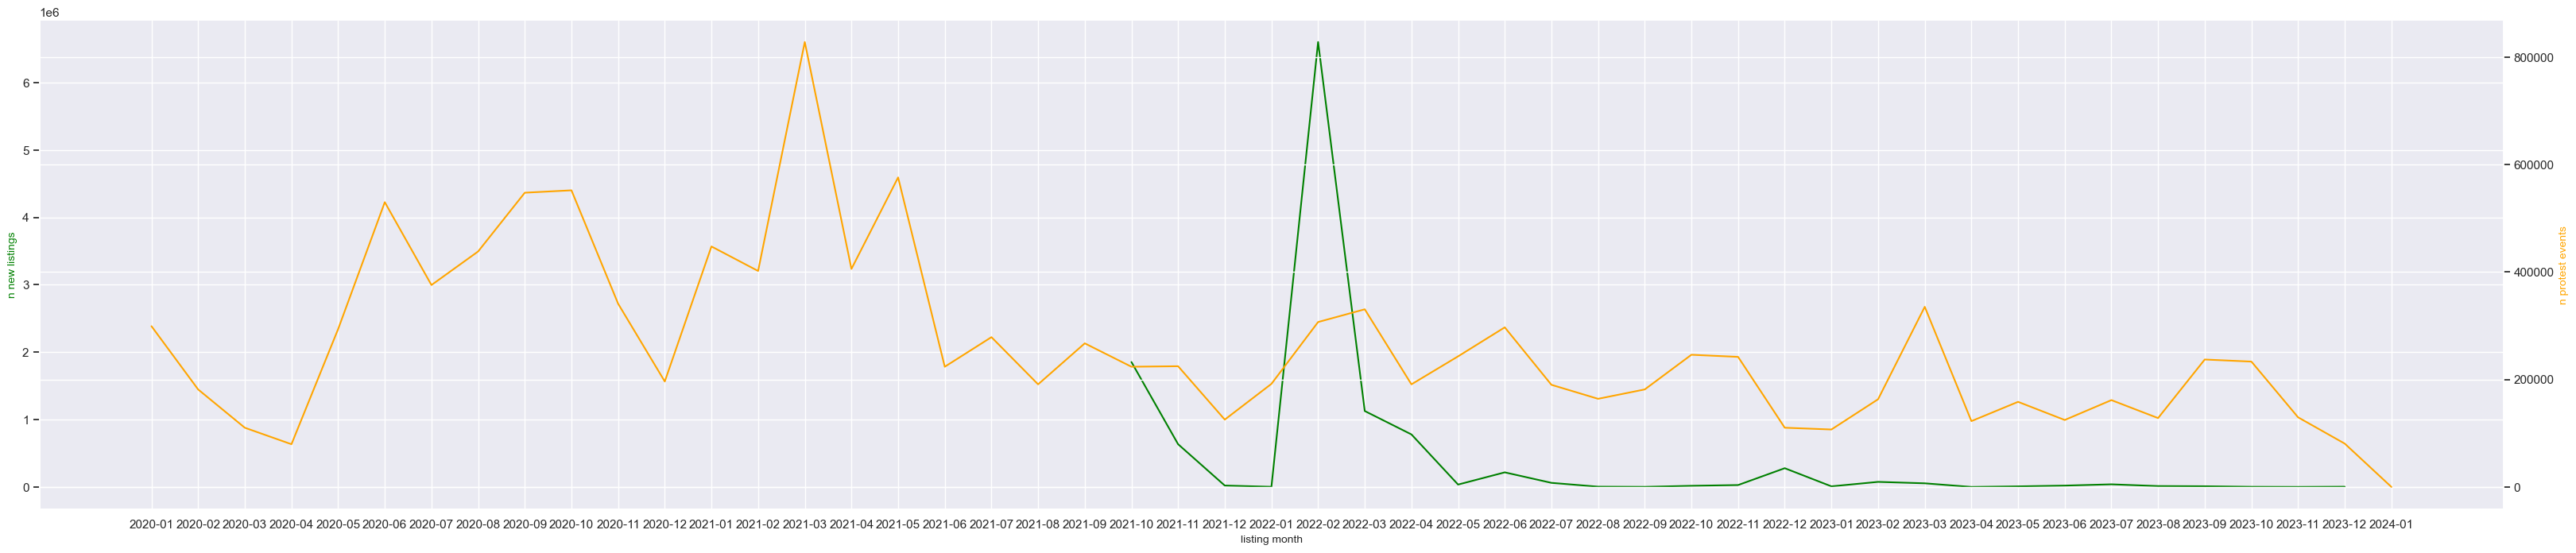

In [34]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(40,8))
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)
# twin object for two different y-axis on the sample plot
ax4=ax.twinx()
# make a plot with different y-axis using second axis object
ax4.plot(grouped_4.month, grouped_4["event_count"],color="orange")
ax4.set_ylabel("n protest events",color="orange",fontsize=10)
plt.savefig('timetrend_eu_fsf_combined_protest.png')

**perform Analysis**

In [35]:
#filter the listings
data = data.copy()
data = data[data['month'] < '2023-01']
data.month.unique()
#filter the trigger events
conflict = conflict.copy()
conflict = conflict[conflict['month'] > '2021-09']
print(conflict.month.unique())

conflict_os = conflict_os.copy()
conflict_os = conflict_os[conflict_os['month'] > '2021-09']
print(conflict_os.month.unique())

protest = protest.copy()
protest = protest[protest['month'] > '2021-09']
protest = protest[protest['month'] < '2023-01']
print(protest.month.unique())

['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12' 'NaT']
['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12']
['2021-10' '2021-11' '2021-12' '2022-01' '2022-02' '2022-03' '2022-04'
 '2022-05' '2022-06' '2022-07' '2022-08' '2022-09' '2022-10' '2022-11'
 '2022-12']


In [36]:
import scipy
from scipy import stats
import statsmodels
#conflict fatalities
print('conflict')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

#one-sided violence
print('one-sided violence')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os.dropna()['fatality_best_estimate'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os['fatality_best_estimate'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

#protest events
print('Protest')
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest.dropna()['event_count'],data.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest['event_count'],data['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

conflict
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: nan
P-value (ANOVA): nan
one-sided violence
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 1113.2297965601629
P-value (ANOVA): 2.4163668646222004e-235
Protest
T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: 8135.65957978629
P-value (ANOVA): 0.0


**now for russia case study**

In [37]:
import scipy
from scipy import stats
import statsmodels
#conflict fatalities
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data_russ.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results conflict fatalities:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data_russ['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results conflict fatalities:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#conflict fatalities OS violence
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os.dropna()['fatality_best_estimate'],data_russ.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results os_violence:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os['fatality_best_estimate'],data_russ['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results os_violence:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#Protest events
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest.dropna()['event_count'],data_russ.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results protest:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest['event_count'],data_russ['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results protest:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

T-Test Results conflict fatalities:
T-statistic: nan
P-value: nan

ANOVA Results conflict fatalities:
F-statistic: nan
P-value (ANOVA): nan
T-Test Results os_violence:
T-statistic: nan
P-value: nan

ANOVA Results os_violence:
F-statistic: 179.9791942433256
P-value (ANOVA): 9.616992690179725e-40
T-Test Results protest:
T-statistic: nan
P-value: nan

ANOVA Results protest:
F-statistic: 1314.4968216041757
P-value (ANOVA): 5.312211982213448e-268


In [38]:
#conflict fatalities
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data_russ2.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results conflict fatalities:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data_russ2['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results conflict fatalities:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#conflict fatalities OS violence
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict_os.dropna()['fatality_best_estimate'],data_russ2.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results one-sided violence:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict_os['fatality_best_estimate'],data_russ2['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results one-sided violence:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)


#Protest events
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(protest.dropna()['event_count'],data_russ2.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results protest events:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(protest['event_count'],data_russ2['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results protest events:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

T-Test Results conflict fatalities:
T-statistic: nan
P-value: nan

ANOVA Results conflict fatalities:
F-statistic: nan
P-value (ANOVA): nan
T-Test Results one-sided violence:
T-statistic: nan
P-value: nan

ANOVA Results one-sided violence:
F-statistic: 1310.2729868079623
P-value (ANOVA): 1.8163063508491827e-270
T-Test Results protest events:
T-statistic: nan
P-value: nan

ANOVA Results protest events:
F-statistic: 9576.360178621211
P-value (ANOVA): 0.0
